In [25]:
# 📄 Carga de datos

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# 🎨 Configuración visual general
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.titlesize"] = 15
plt.rcParams["axes.labelsize"] = 13
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10

# Subir archivo CSV
uploaded = files.upload()

for filename in uploaded.keys():
    df = pd.read_csv(filename)

# Vista rápida
df.head()




Saving enhanced_box_office_data(2000-2024)u.csv to enhanced_box_office_data(2000-2024)u (8).csv


,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
0,1,Mission: Impossible II,546388108.0,215409889.0,39.4,330978219.0,60.6,2000,"Adventure, Action, Thriller",6.126/10,6741.0,en,United States of America
1,2,Gladiator,460583960.0,187705427.0,40.8,272878533.0,59.2,2000,"Action, Drama, Adventure",8.217/10,19032.0,en,"United Kingdom, United States of America"
2,3,Cast Away,429632142.0,233632142.0,54.4,196000000.0,45.6,2000,"Adventure, Drama",7.663/10,11403.0,en,United States of America
3,4,What Women Want,374111707.0,182811707.0,48.9,191300000.0,51.1,2000,"Comedy, Romance",6.45/10,3944.0,en,"United Kingdom, United States of America"
4,5,Dinosaur,349822765.0,137748063.0,39.4,212074702.0,60.6,2000,"Animation, Family, Adventure",6.544/10,2530.0,en,United States of America


In [26]:
# 🧹 Revisión inicial y limpieza

print("✅ Info inicial:")
df.info()

display(df.describe())

print("✅ Columnas disponibles:")
print(df.columns)

print("\n⚠️ Valores nulos antes de limpiar:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

# Imputar nulos en columnas categóricas
df['Genres'] = df['Genres'].fillna("Unknown")
df['Rating'] = df['Rating'].fillna("Not Rated")
df['Production_Countries'] = df['Production_Countries'].fillna("Unknown")
df['Original_Language'] = df['Original_Language'].fillna("Unknown")

# Eliminar filas con nulos en 'Vote_Count'
df = df.dropna(subset=['Vote_Count'])

print("\n✅ Valores nulos después de limpiar:")
missing_data_post = df.isnull().sum()
print(missing_data_post[missing_data_post > 0])

print("\n✅ Info después de limpiar:")
df.info()



✅ Info inicial:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  5000 non-null   int64  
 1   Release Group         5000 non-null   object 
 2   $Worldwide            5000 non-null   float64
 3   $Domestic             5000 non-null   float64
 4   Domestic %            5000 non-null   float64
 5   $Foreign              5000 non-null   float64
 6   Foreign %             5000 non-null   float64
 7   Year                  5000 non-null   int64  
 8   Genres                4822 non-null   object 
 9   Rating                4830 non-null   object 
 10  Vote_Count            4830 non-null   float64
 11  Original_Language     4830 non-null   object 
 12  Production_Countries  4800 non-null   object 
dtypes: float64(6), int64(2), object(5)
memory usage: 507.9+ KB


,Rank,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Vote_Count
count,5000.00000,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,5000.000000,5000.000000,4830.000000
mean,100.50000,1.192137e+08,4.472523e+07,35.740620,7.448809e+07,64.256640,2012.000000,2531.585921
std,57.74008,2.005243e+08,7.727026e+07,30.656992,1.334932e+08,30.654531,7.211824,3946.272827
min,1.00000,1.666028e+06,0.000000e+00,0.000000,0.000000e+00,0.000000,2000.000000,0.000000
25%,50.75000,2.466220e+07,9.275150e+04,0.200000,1.371034e+07,42.200000,2006.000000,205.250000
50%,100.50000,4.844658e+07,1.798421e+07,37.050000,3.019444e+07,62.950000,2012.000000,1035.500000
75%,150.25000,1.197588e+08,5.386847e+07,57.800000,7.211578e+07,99.800000,2018.000000,3065.000000
max,200.00000,2.799439e+09,9.366622e+08,100.000000,1.993811e+09,100.000000,2024.000000,36753.000000


✅ Columnas disponibles:
Index(['Rank', 'Release Group', '$Worldwide', '$Domestic', 'Domestic %',
       '$Foreign', 'Foreign %', 'Year', 'Genres', 'Rating', 'Vote_Count',
       'Original_Language', 'Production_Countries'],
      dtype='object')

⚠️ Valores nulos antes de limpiar:
Genres                  178
Rating                  170
Vote_Count              170
Original_Language       170
Production_Countries    200
dtype: int64

✅ Valores nulos después de limpiar:
Series([], dtype: int64)

✅ Info después de limpiar:
<class 'pandas.core.frame.DataFrame'>
Index: 4830 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  4830 non-null   int64  
 1   Release Group         4830 non-null   object 
 2   $Worldwide            4830 non-null   float64
 3   $Domestic             4830 non-null   float64
 4   Domestic %            4830 non-null   float64
 5   $Foreign   

**✔ Validación completada**

- Se imputaron valores nulos en columnas categóricas.
- Se eliminaron registros con nulos en `Vote_Count`, quedando 4.830 películas.
- Dataset sin nulos y listo para análisis.



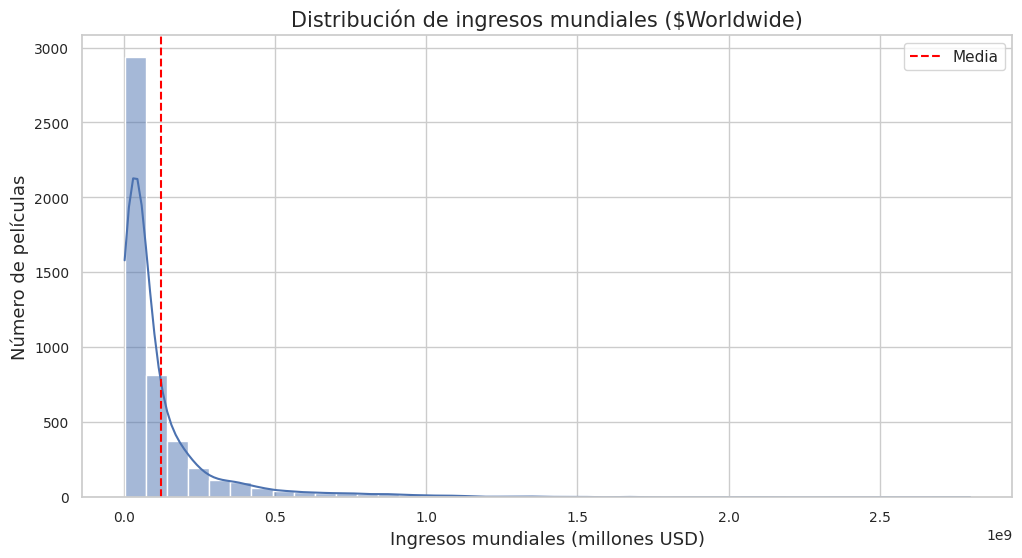

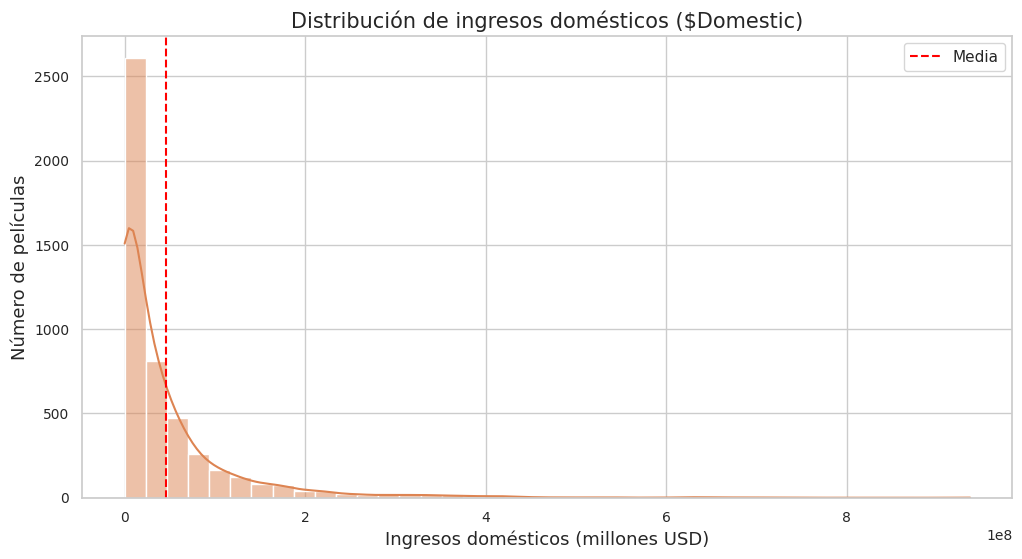

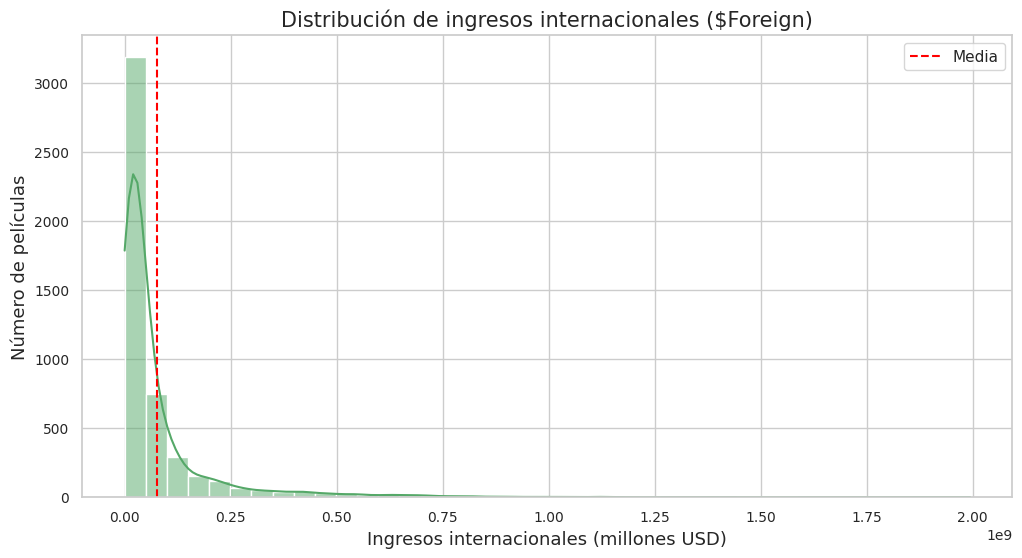

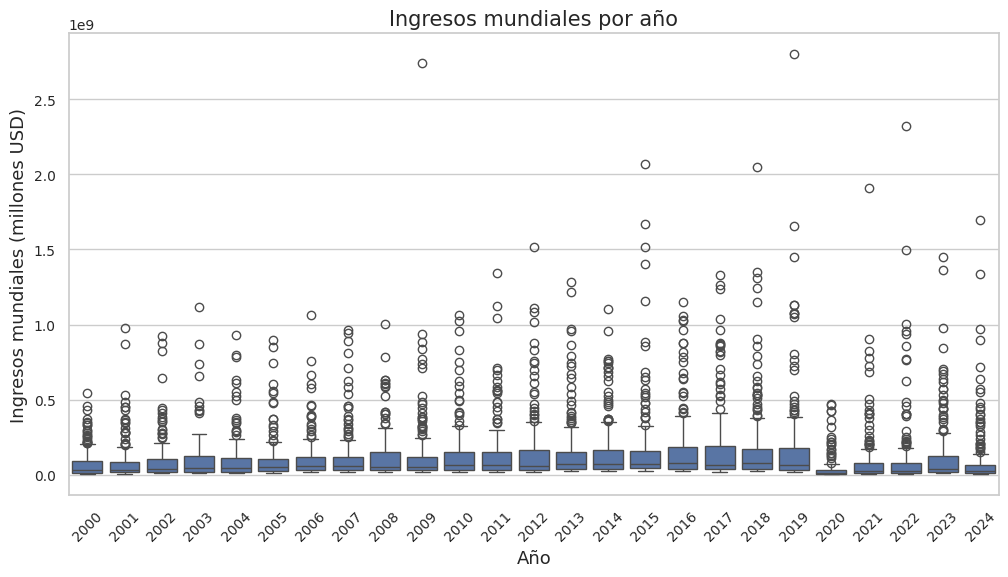

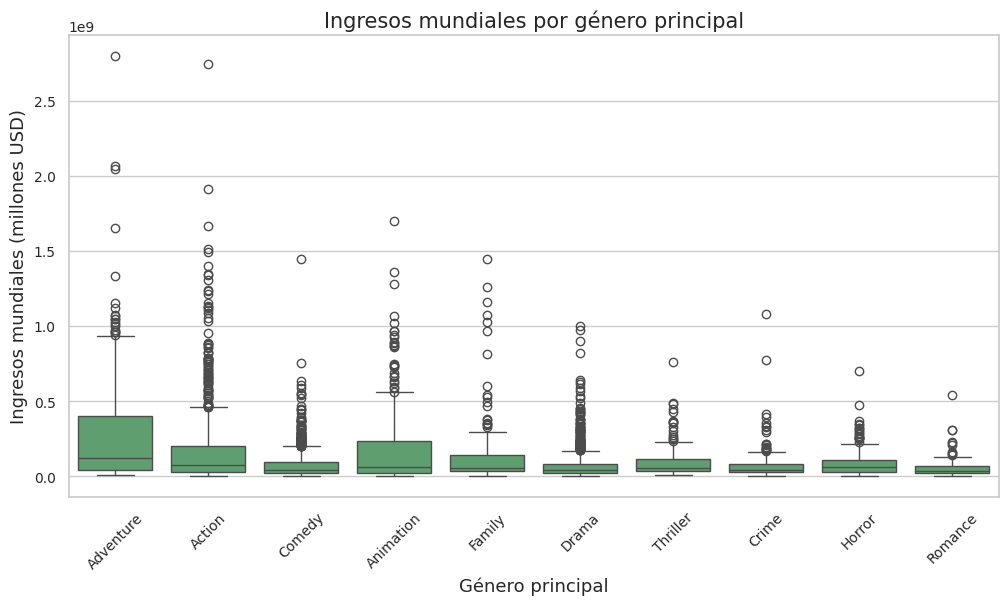

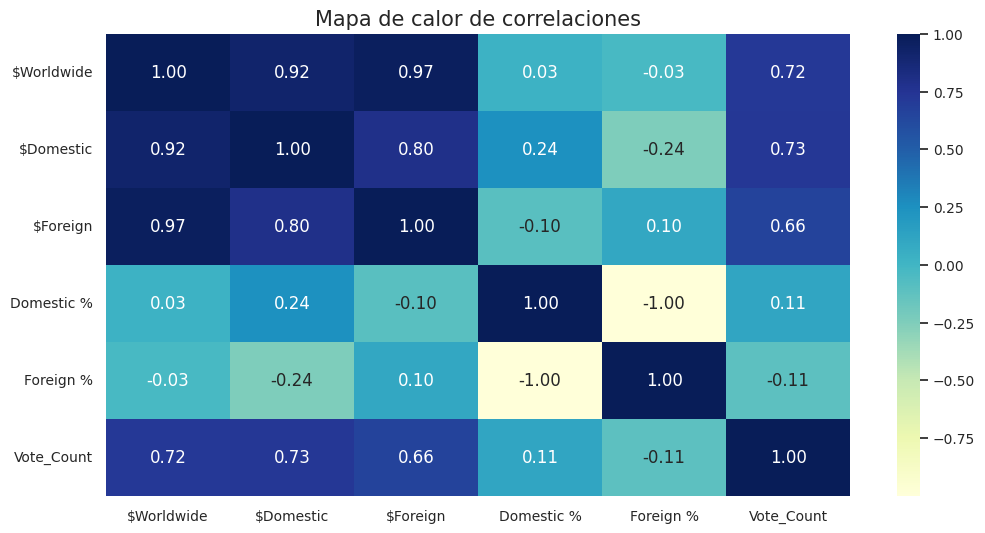

In [27]:
# 💰 Distribución de ingresos mundiales
sns.histplot(df['$Worldwide'], bins=40, kde=True, color="#4C72B0")
plt.title("Distribución de ingresos mundiales ($Worldwide)")
plt.xlabel("Ingresos mundiales (millones USD)")
plt.ylabel("Número de películas")
plt.axvline(df['$Worldwide'].mean(), color="red", linestyle="--", label="Media")
plt.legend()
plt.show()

# 🏠 Ingresos domésticos
sns.histplot(df['$Domestic'], bins=40, kde=True, color="#DD8452")
plt.title("Distribución de ingresos domésticos ($Domestic)")
plt.xlabel("Ingresos domésticos (millones USD)")
plt.ylabel("Número de películas")
plt.axvline(df['$Domestic'].mean(), color="red", linestyle="--", label="Media")
plt.legend()
plt.show()

# 🌍 Ingresos internacionales
sns.histplot(df['$Foreign'], bins=40, kde=True, color="#55A868")
plt.title("Distribución de ingresos internacionales ($Foreign)")
plt.xlabel("Ingresos internacionales (millones USD)")
plt.ylabel("Número de películas")
plt.axvline(df['$Foreign'].mean(), color="red", linestyle="--", label="Media")
plt.legend()
plt.show()

# 🎬 Ingresos por año (sin warnings)
sns.boxplot(x='Year', y='$Worldwide', data=df, color="#4C72B0")
plt.title("Ingresos mundiales por año")
plt.xlabel("Año")
plt.ylabel("Ingresos mundiales (millones USD)")
plt.xticks(rotation=45)
plt.show()

# 🎭 Ingresos por género principal (sin warnings)
df['Main_Genre'] = df['Genres'].apply(lambda x: x.split(",")[0] if pd.notnull(x) else x)
top_genres = df['Main_Genre'].value_counts().head(10).index
sns.boxplot(x='Main_Genre', y='$Worldwide', data=df[df['Main_Genre'].isin(top_genres)], color="#55A868")
plt.title("Ingresos mundiales por género principal")
plt.xlabel("Género principal")
plt.ylabel("Ingresos mundiales (millones USD)")
plt.xticks(rotation=45)
plt.show()

# 🔥 Mapa de calor de correlaciones
corr = df[['$Worldwide', '$Domestic', '$Foreign', 'Domestic %', 'Foreign %', 'Vote_Count']].corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Mapa de calor de correlaciones")
plt.show()



# 💡 Conclusiones y hallazgos clave

# Conclusiones y hallazgos clave

## Top 5 películas más taquilleras

Las películas con mayor recaudación en la base son:

1. Avengers: Endgame (2.79B USD)
2. Avatar (2.79B USD)
3. Star Wars: The Force Awakens (2.07B USD)
4. Avengers: Infinity War (2.05B USD)
5. Jurassic World (1.67B USD)

Patrón: franquicias con audiencias globales, fuerte base en Estados Unidos y alto marketing digital.

---

## Efectos de la pandemia (2020-2021)

Se observa un fuerte descenso en ingresos globales durante 2020 y 2021.  
Reducción drástica en medianas y dispersión de ingresos anuales.  
Muchos estrenos se postergaron y aumentó el consumo de streaming.  
Ejemplo: Tenet (2020) recaudó aproximadamente 365 millones USD, muy por debajo de blockbusters anteriores.

Patrón: la pandemia transformó el modelo de distribución y aceleró tendencias digitales.

---

## Ingresos globales y domésticos

Las películas con ingresos globales superiores a mil millones de dólares mantienen una fuerte recaudación doméstica y un alto volumen de votos.  
Ejemplo: Avengers: Endgame y Star Wars: The Force Awakens.

Patrón: el éxito local refuerza la percepción global y potencia el marketing internacional.

---

## Ingresos internacionales

Las películas con estrategias globales (doblaje, adaptación cultural) logran mayor recaudación fuera de Estados Unidos.  
Ejemplo: Furious 7, donde el 77 por ciento de los ingresos proviene de mercados internacionales.

Patrón: franquicias universales atraen audiencias amplias y maximizan el retorno global.

---

## Géneros top

Los géneros de acción, aventura y animación presentan mayores medianas de ingresos, con topes aproximados entre 300 y 400 millones de dólares.  
Ejemplo: Frozen II y Jurassic World.

Patrón: historias visuales, familiares y universales tienen mayor potencial global.

---

## Patrones anuales

Años clave como 2015 y 2019 muestran picos notables de ingresos debido a grandes lanzamientos.  
2015: Star Wars: The Force Awakens, Jurassic World, Furious 7.  
2019: Avengers: Endgame, The Lion King, Frozen II.

Patrón: la elección del año y las ventanas de estreno son decisivas para maximizar resultados.

---

## Correlaciones clave

Existe una alta correlación entre ingresos domésticos y globales, cercana a 0.94, así como correlación positiva con el número de votos y el engagement digital.

Patrón: el marketing local efectivo y la interacción digital son determinantes para la recaudación final.

---

## Oportunidades detectadas

- Fortalecer universos conectados (Marvel, Star Wars)
- Combinar marketing local sólido con estrategias de expansión global
- Potenciar la interacción digital (reseñas y votos) para maximizar alcance y percepción

